In [1]:
import numpy as np
import pandas as pd
from energy_plot import *
from system import *
from stl_creator import txt_to_stl
from image_3d import *
import matplotlib.pyplot as plt

In [2]:
N = 60

VP = np.genfromtxt(f'vps_data/N{N}.txt', delimiter=', ')

D = distances_matrix(VP)

n = D.shape[0]
D[range(n), range(n)] = 100

D = D/D.min()

D = np.array(D, dtype=float)

D = np.around(D, decimals=0)

print(D)

[[73.  1.  2. ...  5.  5.  5.]
 [ 1. 73.  1. ...  5.  5.  5.]
 [ 2.  1. 73. ...  5.  5.  5.]
 ...
 [ 5.  5.  5. ... 73.  1.  2.]
 [ 5.  5.  5. ...  1. 73.  1.]
 [ 5.  5.  5. ...  2.  1. 73.]]


In [3]:
ALPHA = -0.0
BETA = -1
GAMMA = 5

H = hamiltonian(D, ALPHA, BETA, GAMMA)

H = np.array(H, dtype=float)

H = np.around(H, decimals=1)

print(H)

[[-0. -1. -0. ... -0. -0. -0.]
 [-1. -0. -1. ... -0. -0. -0.]
 [-0. -1. -0. ... -0. -0. -0.]
 ...
 [-0. -0. -0. ... -0. -1. -0.]
 [-0. -0. -0. ... -1. -0. -1.]
 [-0. -0. -0. ... -0. -1. -0.]]


In [4]:
evals, evecs = np.linalg.eig(H)
#evals = np.real(evals)
print(evals)

[-3.         -2.75659825 -2.75659825 -1.82024925  0.13856427  0.38196601
  2.61803399 -2.75659825  0.38196601  0.13856427  2.61803399  2.61803399
 -1.82024925 -1.82024925  0.38196601  0.13856427  2.56155281  2.56155281
  2.56155281  2.56155281  1.43828324  1.43828324  1.43828324  2.
  2.          2.          2.         -1.56155281 -1.56155281 -1.56155281
 -1.56155281 -0.61803399 -0.61803399 -0.61803399 -2.30277564 -2.30277564
 -2.30277564 -2.30277564 -2.30277564  1.61803399  1.61803399 -0.61803399
  1.61803399  1.61803399  1.61803399  1.30277564  1.30277564  1.30277564
  1.30277564  1.30277564 -0.61803399 -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.        ]


[[-3.0], [-2.76, -2.76, -2.76], [-1.82, -1.82, -1.82], [0.14, 0.14, 0.14], [0.38, 0.38, 0.38], [2.62, 2.62, 2.62], [2.56, 2.56, 2.56, 2.56], [1.44, 1.44, 1.44], [2.0, 2.0, 2.0, 2.0], [-1.56, -1.56, -1.56, -1.56], [-0.62, -0.62, -0.62, -0.62, -0.62], [-2.3, -2.3, -2.3, -2.3, -2.3], [1.62, 1.62, 1.62, 1.62, 1.62], [1.3, 1.3, 1.3, 1.3, 1.3], [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]]


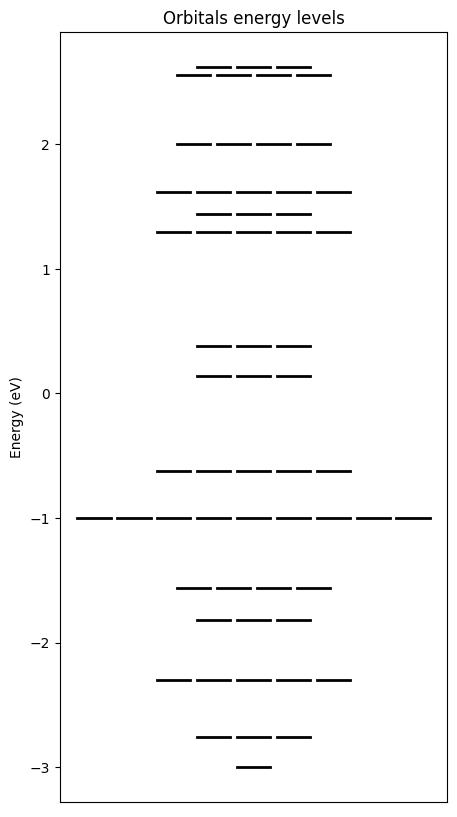

In [5]:
plot_energy_levels(evals, dec=2)
plt.savefig(f'energy_levels/N{N}.png', dpi=600)
# Show the plot
plt.show()

In [6]:
solid_3d = txt_to_stl(VP)

In [7]:
solid_3d.save(f'stl_projects/N{N}.stl')

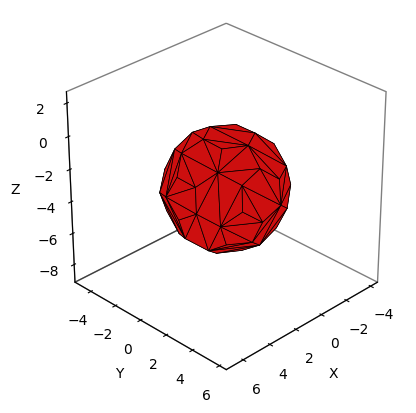

In [8]:
create_image(solid_3d, fcolor='#CD0F0F')
plt.show()

In [9]:
create_video(solid_3d, f'solid_gifs/N{N}.gif', fcolor='#CD0F0F')